<a href="https://colab.research.google.com/github/LEFT-BEE/small_project/blob/main/hdf5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from PIL import Image
import os , glob
import numpy as np
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Convolution2D , Dense , Flatten , Dropout ,MaxPooling2D , Activation
import matplotlib.pyplot as plt

In [2]:
cal_dir = "/content/drive/MyDrive/My project/dataset"
categories = ["ketch","flamingo" , "chair" , "camera" , "butterfly"]
nb_classes = len(categories)

image_w = 64
image_h = 64
pixels = image_w *image_h *3

In [3]:
X = []
Y = []
for idx , cat in enumerate(categories):
  label = [0 for i in range(len(categories))]
  label[idx] = 1 # ex) [0,1,0,0,0]
  #이미지
  image_dir = cal_dir +"/" + cat
  files = glob.glob(image_dir + "/*.jpg")
  for i,f in enumerate(files):
    img = Image.open(f)
    img =  img.convert("RGB")
    img = img.resize((image_w , image_h))
    data = np.asarray(img)#asarray는 copy = false가 기본이다
    X.append(data)
    Y.append(label)
    if i % 10 ==0:
      print(i , "\n", data)
X = np.array(X)
Y = np.array(Y)



0 
 [[[255 255 251]
  [254 254 252]
  [255 253 255]
  ...
  [254 255 249]
  [254 255 251]
  [253 254 251]]

 [[253 255 253]
  [251 254 254]
  [248 252 254]
  ...
  [250 251 249]
  [254 252 252]
  [255 254 254]]

 [[252 254 255]
  [247 254 255]
  [236 247 249]
  ...
  [236 247 247]
  [246 250 251]
  [250 254 255]]

 ...

 [[253 253 251]
  [239 247 244]
  [212 232 227]
  ...
  [203 230 224]
  [227 241 237]
  [244 251 249]]

 [[255 253 254]
  [249 250 249]
  [236 245 241]
  ...
  [229 245 241]
  [243 249 247]
  [250 253 252]]

 [[255 253 254]
  [253 252 252]
  [249 251 250]
  ...
  [244 252 251]
  [248 254 252]
  [251 255 254]]]
10 
 [[[214 208 208]
  [217 210 211]
  [217 211 211]
  ...
  [223 214 209]
  [221 212 207]
  [216 207 202]]

 [[216 210 209]
  [218 212 210]
  [217 211 210]
  ...
  [222 213 208]
  [220 211 206]
  [217 208 203]]

 [[218 213 209]
  [220 215 211]
  [220 215 211]
  ...
  [223 214 209]
  [221 212 207]
  [219 210 205]]

 ...

 [[142 159 166]
  [147 164 171]
  [148 166 

In [4]:
X_train , X_test ,y_train , y_test = train_test_split(X,Y)
#자동으로 나눠주는 함수가 있으므로 이런것들 잘쓰도록 하자.
xy = (X_train , X_test , y_train , y_test)

X_train = X_train.astype("float32") / 256
X_test = X_test.astype("float32") / 256

print("X_train  shape: " , X_train.shape)
print("X_test shape: " , X_test.shape)

X_train  shape:  (288, 64, 64, 3)
X_test shape:  (96, 64, 64, 3)


In [5]:
def model():
  model = Sequential()
  model.add(Convolution2D(32,3,3,
                          padding = "same",
                          input_shape = (image_w , image_h,3),
                          ))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Dropout(0.25))

  model.add(Convolution2D(64 ,3, 3, padding = "same"))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(nb_classes))
  model.add(Activation('softmax'))

  return model
  
model  = model()

In [6]:
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping

class LossHistory(Callback):
  def on_train_begin(self ,logs = {}):
    self.losses = []

  def on_epoch_end(self, batch , logs = {}):
    self.losses.append(logs.get('loss'))

In [7]:
history = LossHistory()
model.compile(loss = "binary_crossentropy" , optimizer = 'rmsprop' , metrics = ['accuracy'])
model.fit(X_train , y_train , batch_size = 32 , epochs = 80 , callbacks=[history])

score = model.evaluate(X_test , y_test)
print('loss = ' , score[0])
print('accruacy = ' , score[1])

Epoch 1/80
9/9 [==============================] - 1s 18ms/step - loss: 0.5725 - accuracy: 0.2226
Epoch 2/80
9/9 [==============================] - 0s 20ms/step - loss: 0.4926 - accuracy: 0.3587
Epoch 3/80
9/9 [==============================] - 0s 18ms/step - loss: 0.4881 - accuracy: 0.3512
Epoch 4/80
9/9 [==============================] - 0s 18ms/step - loss: 0.4663 - accuracy: 0.4548
Epoch 5/80
9/9 [==============================] - 0s 19ms/step - loss: 0.4340 - accuracy: 0.4894
Epoch 6/80
9/9 [==============================] - 0s 20ms/step - loss: 0.4355 - accuracy: 0.4603
Epoch 7/80
9/9 [==============================] - 0s 19ms/step - loss: 0.4136 - accuracy: 0.5116
Epoch 8/80
9/9 [==============================] - 0s 18ms/step - loss: 0.3912 - accuracy: 0.5145
Epoch 9/80
9/9 [==============================] - 0s 18ms/step - loss: 0.4124 - accuracy: 0.5027
Epoch 10/80
9/9 [==============================] - 0s 18ms/step - loss: 0.3604 - accuracy: 0.5614
Epoch 11/80
9/9 [============

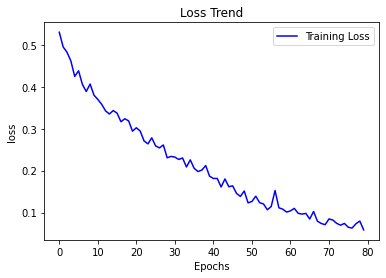

In [8]:
loss = history.losses

plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Loss Trend')
plt.plot(loss, 'blue' , label = "Training Loss")
plt.legend()
plt.show()

In [9]:
pre = model.predict(X_test)
for i,v in enumerate(pre):
  pre_ans = v.argmax()
  ans = y_test[i].argmax()
  dat = X_test[i]

  if ans == pre_ans: continue
  
  print("[NG]" ,categories[pre_ans] , "!=" , categories[ans])
  print(v)

[NG] ketch != butterfly
[9.9990129e-01 1.9219444e-05 4.5951190e-05 4.0049497e-09 3.3496010e-05]
[NG] flamingo != camera
[0.00393478 0.8022909  0.18951735 0.00143152 0.00282544]
[NG] butterfly != chair
[1.36686349e-03 1.04164824e-01 1.23731591e-01 1.52340162e-05
 7.70721495e-01]
[NG] camera != chair
[0.02203515 0.16696267 0.01033299 0.7209849  0.07968432]
[NG] flamingo != chair
[0.12770543 0.73226964 0.1037588  0.01727771 0.01898839]
[NG] chair != butterfly
[0.06029839 0.01861076 0.6406542  0.00185224 0.2785844 ]
[NG] ketch != butterfly
[0.46815336 0.21781857 0.01446154 0.01771175 0.28185472]
[NG] flamingo != butterfly
[0.0062249  0.48655584 0.32170153 0.1160045  0.06951331]
[NG] flamingo != butterfly
[3.8172046e-04 7.4943191e-01 5.8717065e-02 3.2688409e-02 1.5878086e-01]
[NG] ketch != chair
[0.818601   0.00725633 0.11073463 0.05243279 0.01097524]
[NG] flamingo != butterfly
[7.3441970e-03 8.9166719e-01 7.6133711e-03 2.0432548e-04 9.3170904e-02]
[NG] ketch != camera
[1.0000000e+00 1.8760

In [ ]:
hdf5_file = "/content/drive/MyDrive/My project/CNN_IMAGE_recog/5obj-model.hdf5"
if os.path.exists(hdf5_file):
  model.load_weights(hdf5_file)
else:
  model.fit(X_train , y_train , batch_size= 32 , epochs = 50)
  model.save_weights(hdf5_file)